In [1]:
# Main questions:
# What factors have a significant impact on the cost of the order?
# What factors affect make order?

# Process followed:
# 1. Import libraries
# 2. Import and read dataset
# 3. Clean dataset
# 4. Do EDA (exploratory data analysis)
# 5. Do one-way ANOVA tests
# 6. Do the two-way ANOVA tests

In [2]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
# 2. Import and read dataset
file_path = '/Users/mitya/Desktop/orders.csv'
df = pd.read_csv(file_path, header=None, sep='|', quotechar='§')

/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_3022/1165002680.py:3: ParserWarning: Falling back to the 'python' engine because ord(quotechar) > 127, meaning the quotechar is larger than one byte, and the 'c' engine does not support such quotechars; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, header=None, sep='|', quotechar='§')


In [ ]:
# 3. Clean dataset
# We need to clean the data: drop the first row and move column labels to header
# We set the column labels to equal the values in the 1st row (index location 0):
df.columns = df.iloc[0]

# Then we drop the 1st row using iloc
# We will save the new dataset as df_cleaned and will use this dataset from the rest of the operations
df_cleaned = df.iloc[pd.RangeIndex(len(df)).drop(0)]

# We convert the 'total' column data to numeric:
df_cleaned.total = pd.to_numeric(df_cleaned['total'], errors='coerce')
# Convert the 'distance' column data to numeric:
df_cleaned.distance = pd.to_numeric(df_cleaned['distance'], errors='coerce')
# Convert the 'duration' column data to numeric:
df_cleaned.duration = pd.to_numeric(df_cleaned['duration'], errors='coerce')

# Leave orders that are interesting for research:
df_cleaned = df_cleaned[df_cleaned.status_id != 'NEW']
df_cleaned = df_cleaned[df_cleaned.status_id != 'CALC']


# Group orders by cargo count
df_cleaned_cargo_count_0 = df_cleaned[df_cleaned.cargo_count == '0']
df_cleaned_cargo_count_1 = df_cleaned[df_cleaned.cargo_count == '1']
df_cleaned_cargo_count_2 = df_cleaned[df_cleaned.cargo_count == '2']
df_cleaned_cargo_count_3 = df_cleaned[df_cleaned.cargo_count == '3']
df_cleaned_cargo_count_4 = df_cleaned[df_cleaned.cargo_count == '4']

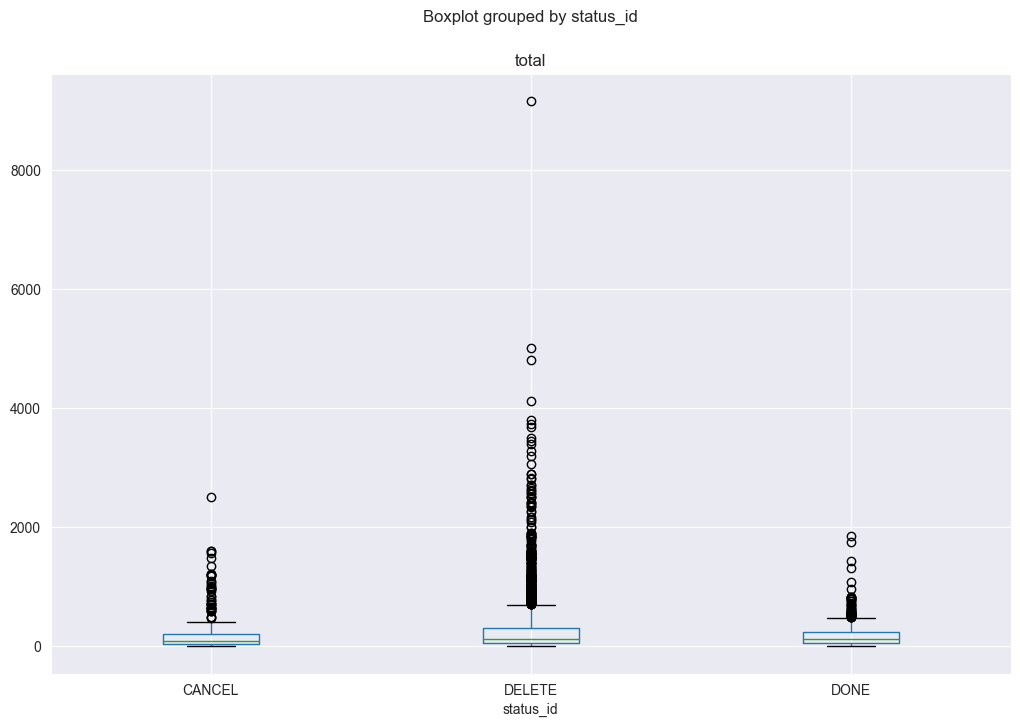

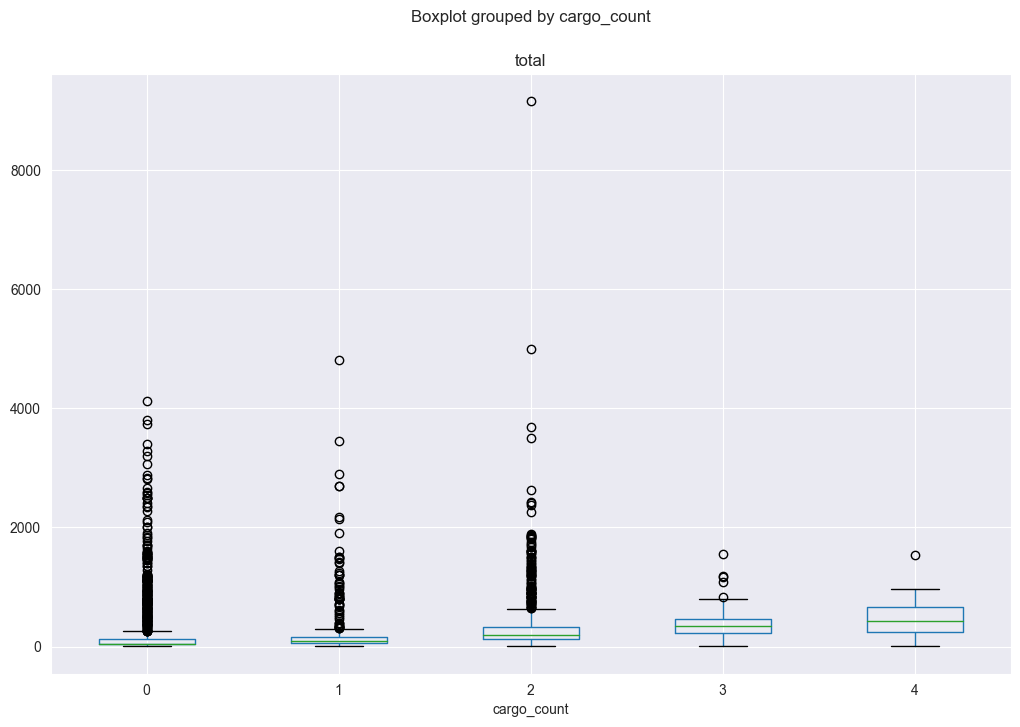

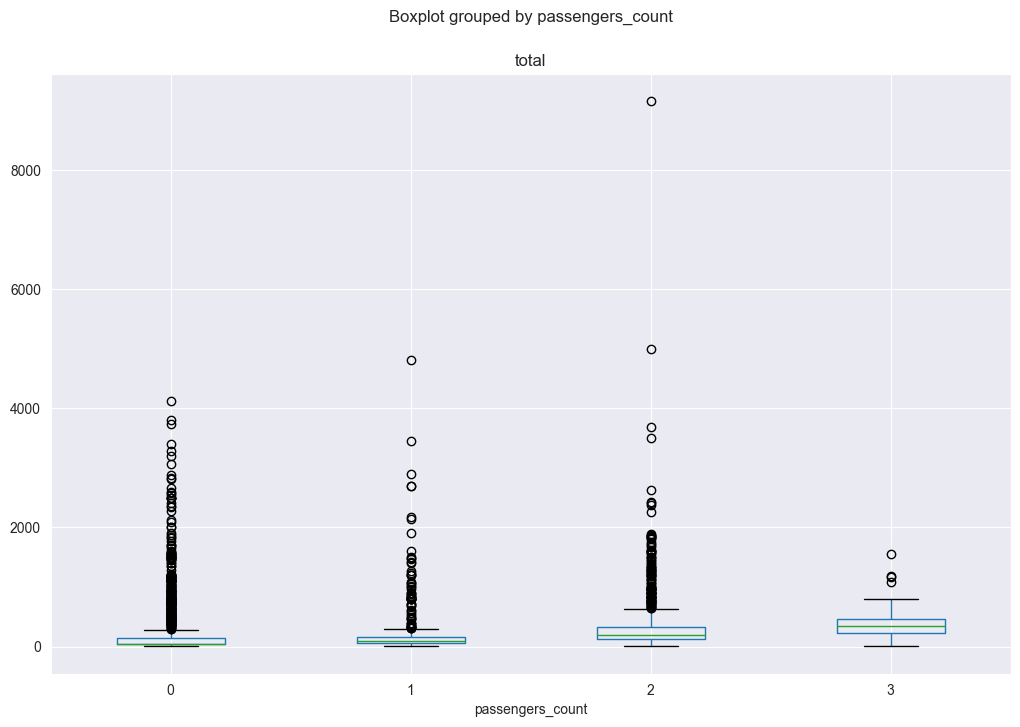

In [5]:
# 4. Do EDA (exploratory data analysis)
# Find outliers using boxplot
df_cleaned.boxplot('total', by='status_id', figsize=(12, 8), grid=True)
df_cleaned.boxplot('total', by='cargo_count', figsize=(12, 8), grid=True)
df_cleaned.boxplot('total', by='passengers_count', figsize=(12, 8), grid=True)
plt.show()

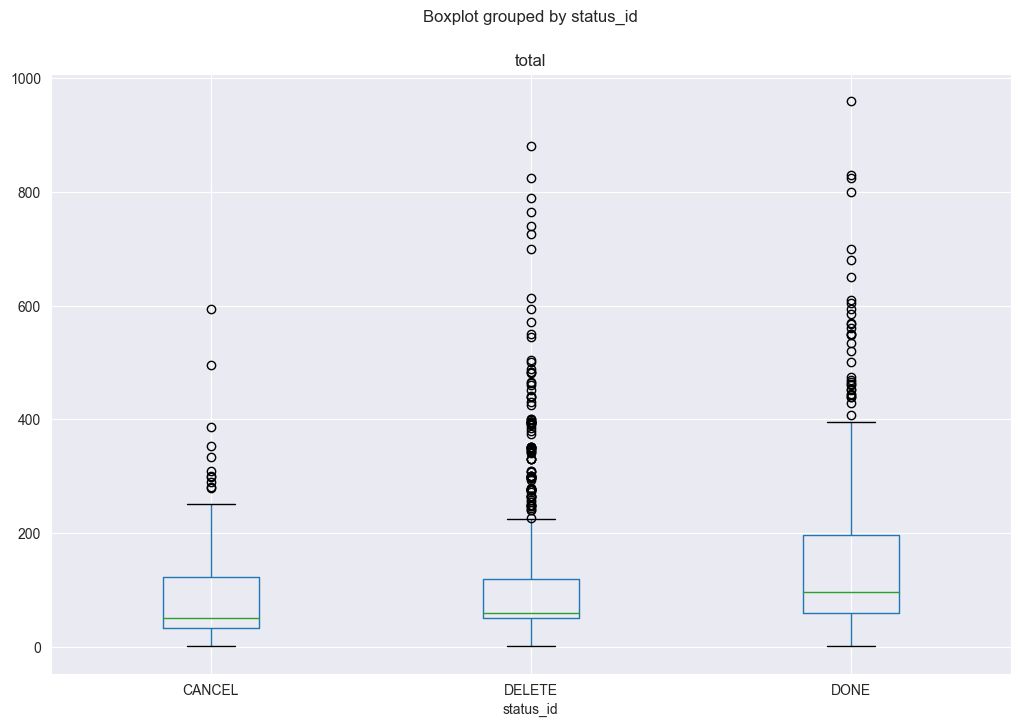

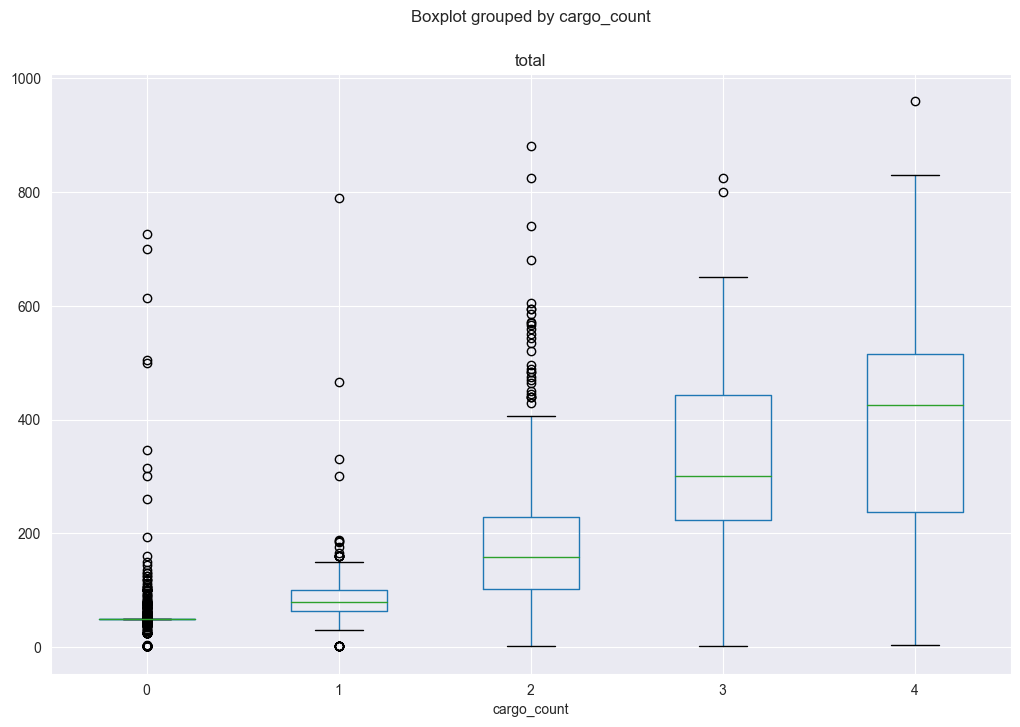

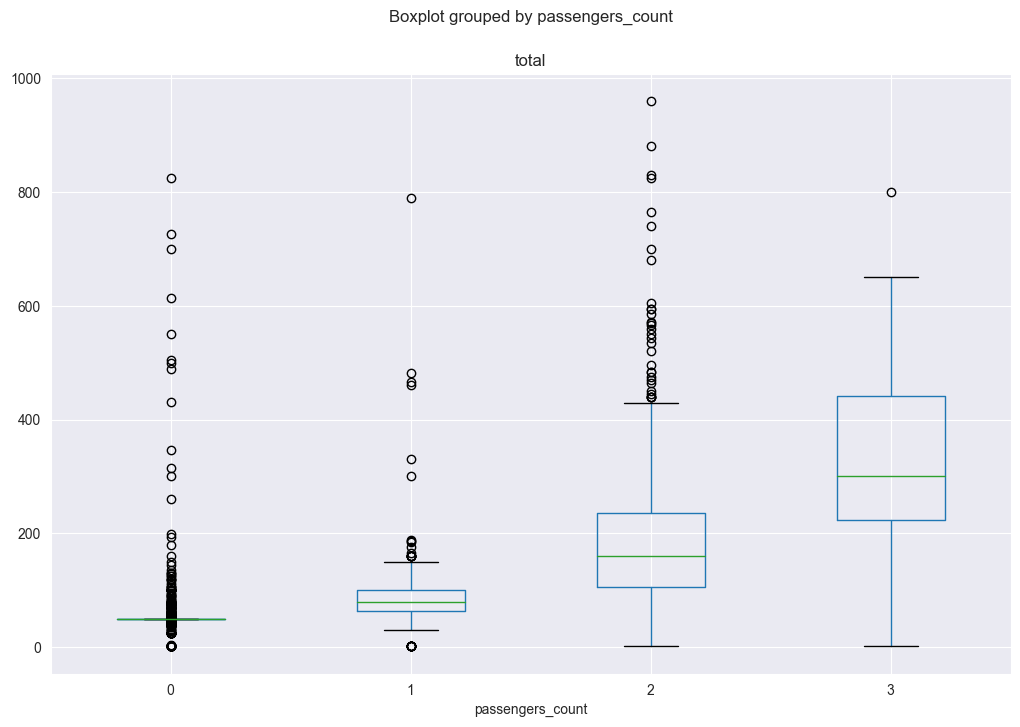

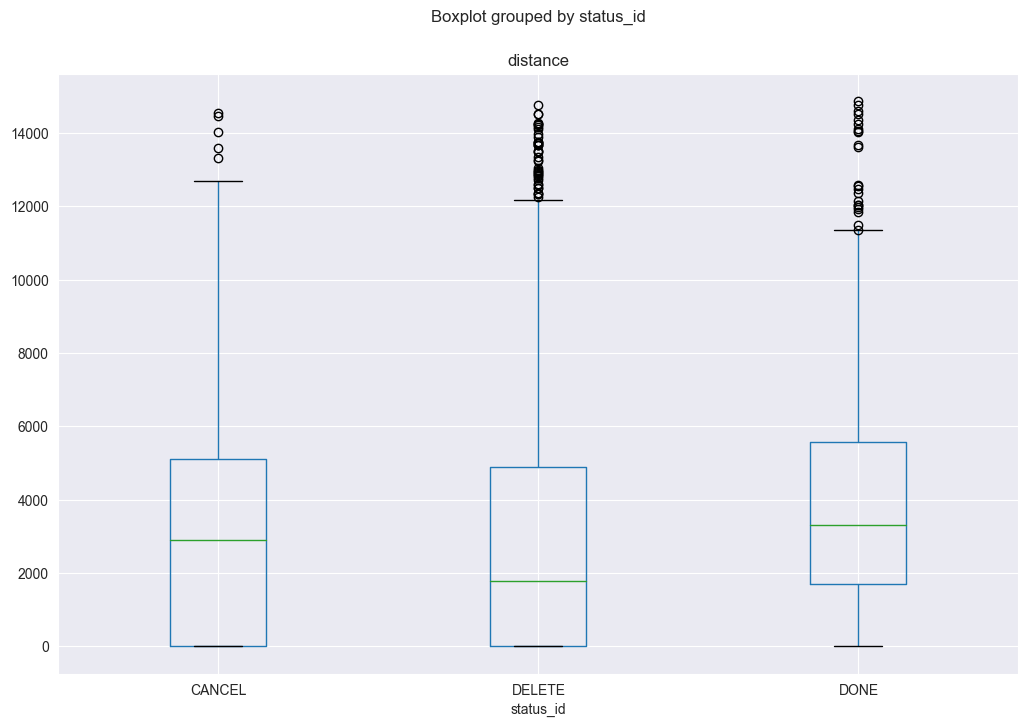

In [6]:
# Delete outliers:
df_cleaned = df_cleaned[df_cleaned.total <= 1000]
df_cleaned = df_cleaned[df_cleaned.distance <= 15000]

# Check the result
df_cleaned.boxplot('total', by='status_id', figsize=(12, 8), grid=True)
df_cleaned.boxplot('total', by='cargo_count', figsize=(12, 8), grid=True)
df_cleaned.boxplot('total', by='passengers_count', figsize=(12, 8), grid=True)
df_cleaned.boxplot('distance', by='status_id', figsize=(12, 8), grid=True)
plt.show()

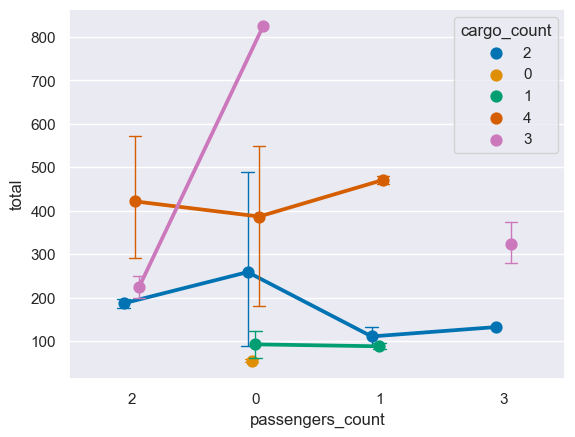

In [7]:
# Let's see how orders cost influenced by cargo count, passengers count, order status, duration via pointplot
# First pair cargo count:passengers count
sns.set()
sns.pointplot(data=df_cleaned, x='passengers_count', y='total', hue='cargo_count', dodge=True, capsize=.1, errwidth=1, palette='colorblind')
plt.show()
# We see that passengers count not affect the cost of the order.

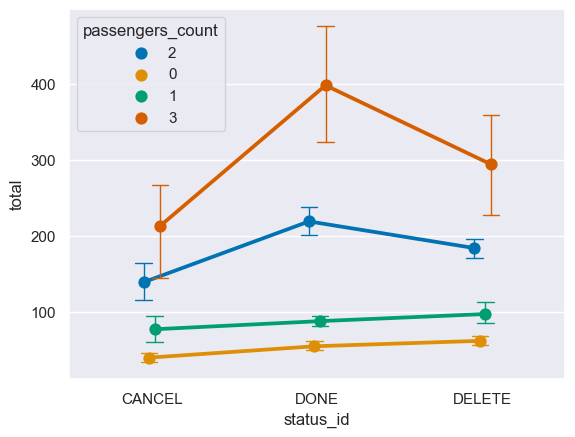

In [8]:
# Next pair order status:passengers count
sns.set()
sns.pointplot(data=df_cleaned, x='status_id', y='total', hue='passengers_count', dodge=True, capsize=.1, errwidth=1, palette='colorblind')
plt.show()
# We see that order status have a strong influence on the cost of the order, also we see that passengers count
# began to significantly influence. Our hypothesis is that the cargo count affects the passengers count,
# and this, in turn, affects the cost of the order.

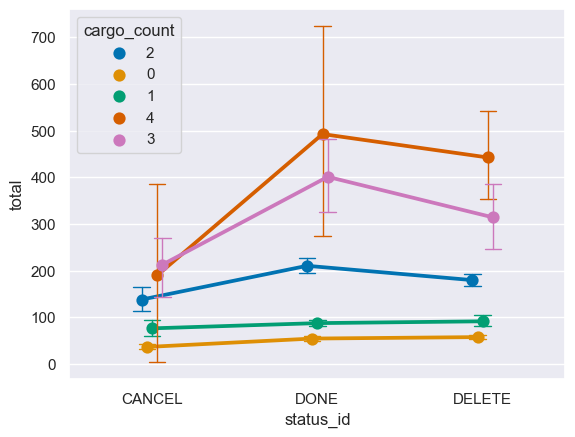

In [9]:
# Next pair order status:cargo count
sns.set()
sns.pointplot(data=df_cleaned, x='status_id', y='total', hue='cargo_count', dodge=True, capsize=.1, errwidth=1, palette='colorblind')
plt.show()
# We see that cargo count affect the cost of the order. Order status also affects the cost,
# especially in orders with the "Delete" status and the count of loaders: 0, 1, 2.

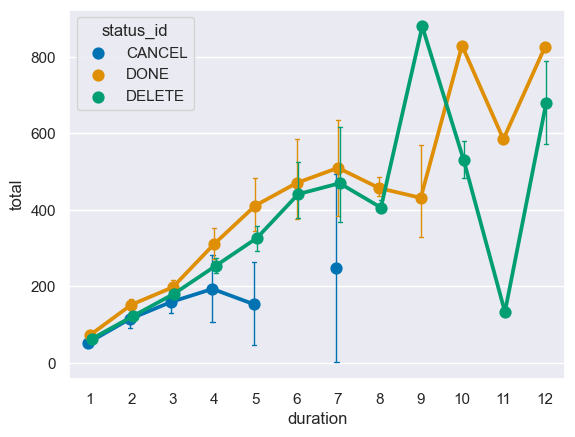

In [10]:
# Next pair order status:duration
sns.set()
sns.pointplot(data=df_cleaned, x='duration', y='total', hue='status_id', dodge=True, capsize=.1, errwidth=1, palette='colorblind')
plt.show()

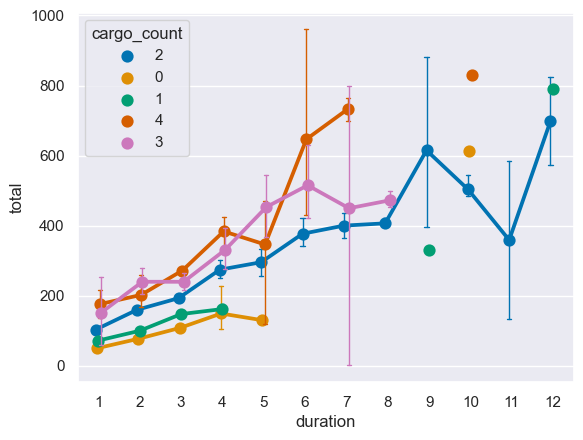

In [11]:
# Next pair cargo_count:duration
sns.set()
sns.pointplot(data=df_cleaned, x='duration', y='total', hue='cargo_count', dodge=True, capsize=.1, errwidth=1, palette='colorblind')
plt.show()

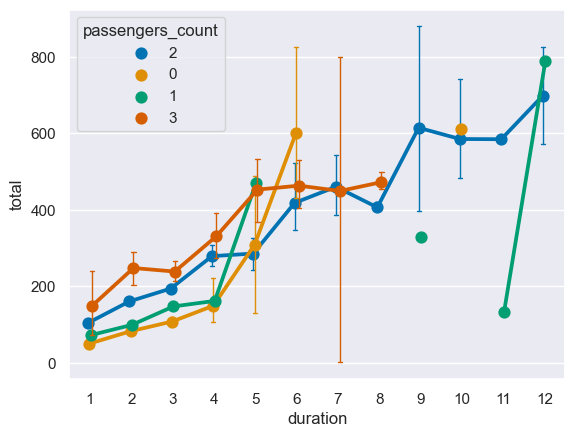

In [12]:
# Last pair passengers_count:duration
sns.set()
sns.pointplot(data=df_cleaned, x='duration', y='total', hue='passengers_count', dodge=True, capsize=.1, errwidth=1, palette='colorblind')
plt.show()

In [13]:
# Intermediate conclusions:
# Strong affects: duration, cargo count.
# Order status. there is an influence, but it depends on other factors.
# No affects: passengers count

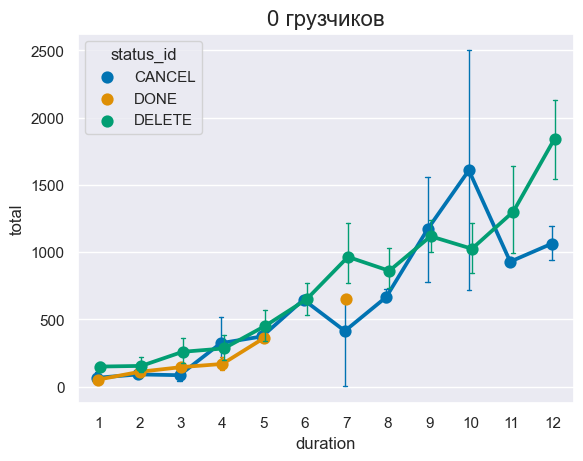

In [14]:
# Pair duration:status_id group by cargo count
sns.set()
sns.pointplot(data=df_cleaned_cargo_count_0, x='duration', y='total', hue='status_id', dodge=True, capsize=.1, errwidth=1, palette='colorblind')
plt.title('0 грузчиков', fontsize=16)
plt.show()

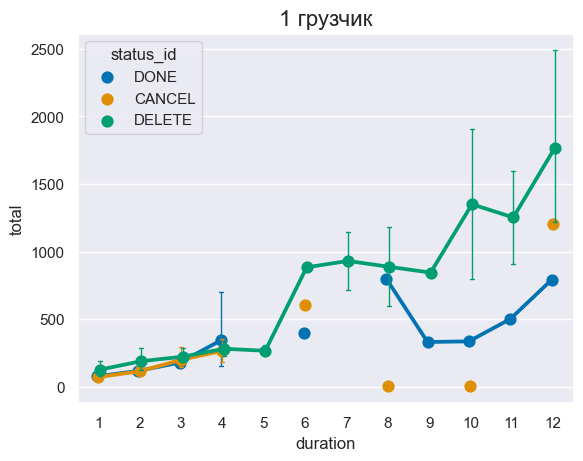

In [15]:
sns.pointplot(data=df_cleaned_cargo_count_1, x='duration', y='total', hue='status_id', dodge=True, capsize=.1, errwidth=1, palette='colorblind')
plt.title('1 грузчик', fontsize=16)
plt.show()

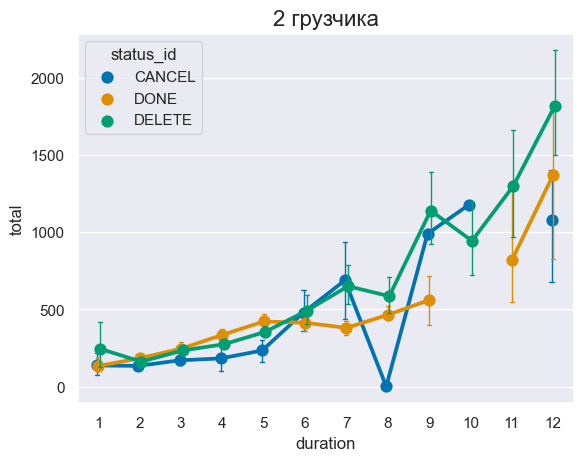

In [16]:
sns.pointplot(data=df_cleaned_cargo_count_2, x='duration', y='total', hue='status_id', dodge=True, capsize=.1, errwidth=1, palette='colorblind')
plt.title('2 грузчика', fontsize=16)
plt.show()

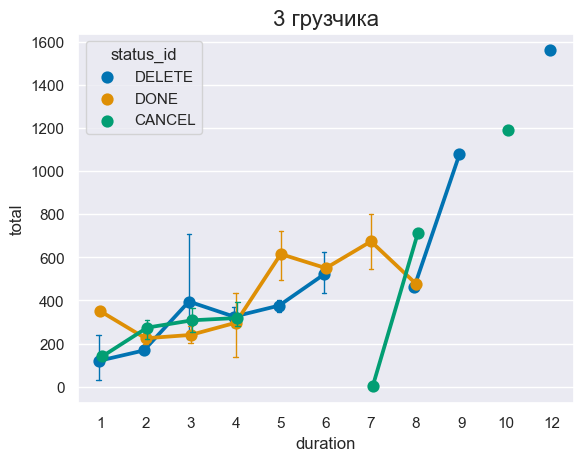

In [17]:
sns.pointplot(data=df_cleaned_cargo_count_3, x='duration', y='total', hue='status_id', dodge=True, capsize=.1, errwidth=1, palette='colorblind')
plt.title('3 грузчика', fontsize=16)
plt.show()

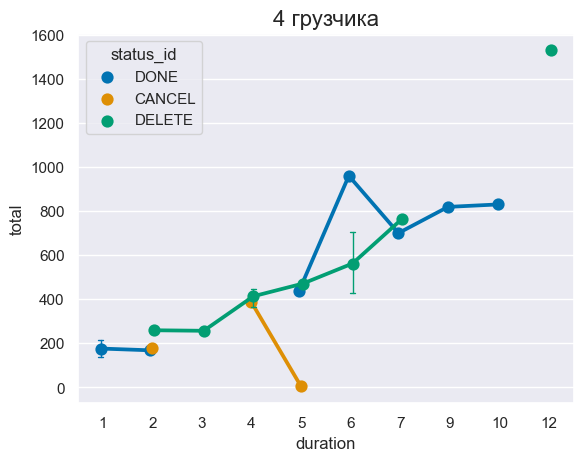

In [18]:
sns.pointplot(data=df_cleaned_cargo_count_4, x='duration', y='total', hue='status_id', dodge=True, capsize=.1, errwidth=1, palette='colorblind')
plt.title('4 грузчика', fontsize=16)
plt.show()

In [19]:
# 5. Let's do the one-way ANOVA tests.
# Create first samples set group be cargo and passengers count. The null hypothesis that samples have the same means
# Delete outliers:
df_cleaned = df_cleaned[df_cleaned.duration <= 3]
# Create groups:
cargo_0_passengers_0 = df_cleaned[(df_cleaned['cargo_count'] == '0') & (df_cleaned['passengers_count'] == '0')]["total"]
print('cargo_0_passengers_0 mean:', cargo_0_passengers_0.mean())
cargo_1_passengers_0 = df_cleaned[(df_cleaned['cargo_count'] == '1') & (df_cleaned['passengers_count'] == '0')]["total"]
print('cargo_1_passengers_0 mean:', cargo_1_passengers_0.mean())
cargo_2_passengers_0 = df_cleaned[(df_cleaned['cargo_count'] == '2') & (df_cleaned['passengers_count'] == '0')]["total"]
print('cargo_2_passengers_0 mean:', cargo_2_passengers_0.mean())
cargo_4_passengers_0 = df_cleaned[(df_cleaned['cargo_count'] == '4') & (df_cleaned['passengers_count'] == '0')]["total"]
print('cargo_4_passengers_0 mean:', cargo_4_passengers_0.mean())

cargo_1_passengers_1 = df_cleaned[(df_cleaned['cargo_count'] == '1') & (df_cleaned['passengers_count'] == '1')]["total"]
print('cargo_1_passengers_1 mean:', cargo_1_passengers_1.mean())
cargo_2_passengers_1 = df_cleaned[(df_cleaned['cargo_count'] == '2') & (df_cleaned['passengers_count'] == '1')]["total"]
print('cargo_2_passengers_1 mean:', cargo_2_passengers_1.mean())

cargo_2_passengers_2 = df_cleaned[(df_cleaned['cargo_count'] == '2') & (df_cleaned['passengers_count'] == '2')]["total"]
print('cargo_2_passengers_2 mean:', cargo_2_passengers_2.mean())
cargo_4_passengers_2 = df_cleaned[(df_cleaned['cargo_count'] == '4') & (df_cleaned['passengers_count'] == '2')]["total"]
print('cargo_4_passengers_2 mean:', cargo_4_passengers_2.mean())
cargo_3_passengers_3 = df_cleaned[(df_cleaned['cargo_count'] == '3') & (df_cleaned['passengers_count'] == '3')]["total"]
print('cargo_3_passengers_3 mean:', cargo_3_passengers_3.mean())

cargo_0_passengers_0 mean: 53.14334600760456
cargo_1_passengers_0 mean: 92.25
cargo_2_passengers_0 mean: 143.5
cargo_4_passengers_0 mean: 180.0
cargo_1_passengers_1 mean: 83.81632653061224
cargo_2_passengers_1 mean: 88.0
cargo_2_passengers_2 mean: 145.54112554112555
cargo_4_passengers_2 mean: 210.2
cargo_3_passengers_3 mean: 210.43478260869566


In [20]:
# Find F critical value
# Calculate Degree of freedom between groups (count of groups minus 1)
df_between = 9 - 1
# Calculate Degree of freedom within group (count of observations minus count of groups)
df_within = len(cargo_0_passengers_0) + len(cargo_1_passengers_0) + len(cargo_1_passengers_1)\
            + len(cargo_2_passengers_0) + len(cargo_2_passengers_1) + len(cargo_2_passengers_2) \
            + len(cargo_3_passengers_3) + len(cargo_4_passengers_0) + len(cargo_4_passengers_2) - 9
# Significance level is 0.05
sign_level = 1 - .05

f_critical_value = stats.f.ppf(q=sign_level, dfn=df_between, dfd=df_within)
print('f_critical_value:', f_critical_value)

# Find F and P values
print("Results for all groups", stats.f_oneway(cargo_0_passengers_0, cargo_1_passengers_0, cargo_1_passengers_1,
                                               cargo_2_passengers_0, cargo_2_passengers_1, cargo_2_passengers_2,
                                               cargo_3_passengers_3, cargo_4_passengers_0, cargo_4_passengers_2))

f_critical_value: 1.9442828255926594
Results for all groups F_onewayResult(statistic=105.26083994705512, pvalue=1.2890716674014426e-140)


In [21]:
# Intermediate conclusions:
# Result F critical value: 1.9427521888817838, F value: 2.534611657754996, P value: 0.009572721500156237,
# reject the null hypothesis

In [22]:
# 6. Let's do the two-way ANOVA tests.
# Find F and P values, the sum_sq, mean_sq and df using two-way analysis of variance
# cargo_count+passengers_count
expr_lm = ols('total ~ cargo_count:passengers_count', data=df_cleaned).fit()
table_1 = sm.stats.anova_lm(expr_lm, type=2)
print(table_1)

expr_lm = ols('total ~ cargo_count*passengers_count', data=df_cleaned).fit()
table_2 = sm.stats.anova_lm(expr_lm, type=2)
print(table_2)

                                  df        sum_sq        mean_sq          F  \
cargo_count:passengers_count    19.0  2.985639e+06  157138.871720  45.229712   
Residual                      1573.0  5.464979e+06    3474.239909        NaN   

                                     PR(>F)  
cargo_count:passengers_count  6.958943e-134  
Residual                                NaN  
                                  df        sum_sq        mean_sq           F  \
cargo_count                      4.0  2.959804e+06  739950.929871  213.026963   
passengers_count                 3.0  3.492459e+03    1164.153063    0.335152   
cargo_count:passengers_count    12.0  5.848369e+04    4873.640436    1.403089   
Residual                      1573.0  5.463829e+06    3473.508328         NaN   

                                     PR(>F)  
cargo_count                   3.794848e-146  
passengers_count               7.999322e-01  
cargo_count:passengers_count   1.572478e-01  
Residual                       

In [23]:
# Intermediate conclusions:
# sum_sq for Counts is SSB (2190384, 31146.31)
# sum_sq for Residual is SSW (232344100)
# We find significant differences within groups
# Passengers count. F value: 0.095177  P value: 0.962717
# Passengers count not make significant difference

In [24]:
# cargo_count+status_id
expr_lm = ols('total ~ cargo_count*status_id', data=df_cleaned).fit()
table_3 = sm.stats.anova_lm(expr_lm, type=2)
print(table_3)

                           df        sum_sq        mean_sq           F  \
cargo_count               4.0  2.959804e+06  739950.929871  218.699679   
status_id                 2.0  6.596555e+04   32982.774480    9.748379   
cargo_count:status_id     8.0  9.418626e+04   11773.282986    3.479708   
Residual               1569.0  5.308572e+06    3383.411134         NaN   

                              PR(>F)  
cargo_count            3.011944e-149  
status_id               6.200420e-05  
cargo_count:status_id   5.464037e-04  
Residual                         NaN  


In [25]:
# Intermediate conclusions:
# cargo_count and status_id have strong affects